# Wine Quality Analysis

This analysis examines a possible model to predict wine quality rating using chemical measurement inputs.

## Business Understanding

There's many aspects to consider when making wine in order to produce a great quality product. A lot of those considerations are of the chemical composition as it most directly affects a wine's taste, color, and other aspects. Typical consumers don't pick wine by examining the chemical properties however, and instead rely on their subjective judgement using their senses, or on external influences such as recommendations from friends or reviews by wine experts.

Businesses involved in wine have a vested interest in understanding how the chemical properties translate into perceived quality. Knowing this relationship will give them a powerful advantage to making profitable recommendations to customers and an effective pricing model. Going further up the pipeline, wineries and winemakers themselves can benefit from this knowledge by knowing what aspects are most important to control in the winemaking process. This can prevent time, money, and resources from being wasted on low qualitty wines.

## Data Understanding and Preparation

The first step in the analysis is to understand the data being used and what information is available for analysis. Referring to the original data source on the UCI Machine Learning Repository website, the dataset was created from measurements of red variants of Vinho Verde wine from Portugal.

Chemical measurements of the wines were taken, measuring features such as pH, density, sugar content, and of course alcohol. Along with the chemical measurements is a subjective quality rating from 0 to 10, obtained from wine experts.

Let's import the dataset to get a better understanding of its structure:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mord
from mord import LogisticAT
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
dfred = pd.read_csv('winequality-red.csv', delimiter=';') # Import CSV data

In [3]:
print(dfred.info(),'\n')  # Check structure and missing values
print(dfred.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000

Examining the structure of the dataframe reveals it is made up of 1599 data points and 12 features. Luckily, the original data collection appears to have been completed very well as there are no missing values in any of the features. The chemical features are all measured in float type values while the quality rating is an integer. This matches our expectations based on the description of the original data.

Taking a look at the statistics does reveal something of interest. The chemical features appear to vary significantly in their scaling. For example, alcohol spans from 8.4 to 14.9 while volatile acidity's maximum is only 1.58. It isn't clear just from the dataset what the expected range for these values are. For most lay-people, pH and alcohol are understandable. Both fall within the expected range (normal pH scale is 0 to 7; alcohol content of 8.4% to 14.9% is normal for wine).

Let's take a look at the distribution of the quality ratings specifically:

Text(0.5, 0, 'Quality')

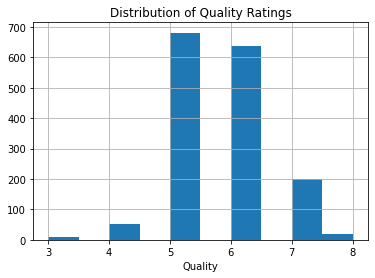

In [4]:
dfred['quality'].hist()  # Distribution of quality ratings
plt.title('Distribution of Quality Ratings')
plt.xlabel('Quality')

The quality ratings range from 3 to 8, with most being in the 5 or 6 category. Very high quality and very low quality wines appear to be under-represented in these ratings and may be something to consider for further studies. Modeling based off this dataset may provide higher accuracy for predicting mid-quality wines, but less so for very high or very low quality wines.

## Modeling

The output of this data is a categorical quality rating. Therefore some regression or classification techniques could be used to model the relationship between the chemical components and quality. One such method is a logistic regression, which seeks to predict a binary outcome. This could be used, for example, to specifically target a single rating or category such as if a wine will be high or low quality.

However this would be tedious to accomplish as there are multiple categories of quality. Additionally, the quality rating is ordinal, a rating of 8 is higher than a rating of 4 and that difference has meaning. Using a logistic regression, the categories would have to be combined further or only certain ones targeted. There's a modification of the logistic regression that accounts for ordinal data simply referred to as an ordinal regression. An ordinal regression is similar to a logistic regression, but instead models the output as multiple ordered categories rather than a binary. More information on ordinal regression can be found on [Statistics Solutions](https://www.statisticssolutions.com/regression-analysis-ordinal-regression/) website.

For this ordinal regression model, we'll make use of the sklearn library along with the mord library. Following sklearn format, the data will be split into a training and test set to train and then evaluate the model. The training set used to create the model, then the test set used to predict outcomes and evaluate those against the known quality ratings.

In [5]:
# Create training and test sets:
X_train, X_test, y_train, y_test = train_test_split(
                                   dfred.drop(['quality'],axis=1),
                                   dfred['quality'],
                                   random_state = 42)

ordinal_model = LogisticAT()
fit = ordinal_model.fit(X_train, y_train)  # Fit training data to model
pred = fit.predict(X_test)  # Predict outcomes for test data

## Evaluation

The next step for this model is to evaluate it's effectiveness by examining various metrics about the predictions it makes and the model itself. A common piece of information used to evaluate a model is a classification report. The classification report shows metrics such as precision, recall, and an overall accuracy.

A classification report is useful for evaluating the accuracy of a model, but it doesn't describe the relationship between the features and the output variable. To find this information we can look at the coefficients of the input features. The coefficients describe the change in the output variable as that feature changes, holding all other equal.

In [6]:
print('Classification Report:\n')
print(metrics.classification_report(y_test, pred, zero_division=0))

print('\nFeature Coefficients:\n')
for i,c in enumerate(X_train.columns):
    print(c, round(fit.coef_[i], 3))

Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.64      0.74      0.68       164
           6       0.55      0.62      0.58       169
           7       0.40      0.17      0.24        48
           8       0.00      0.00      0.00         5

    accuracy                           0.58       400
   macro avg       0.26      0.25      0.25       400
weighted avg       0.54      0.58      0.55       400


Feature Coefficients:

fixed acidity 0.05
volatile acidity -3.083
citric acid -0.463
residual sugar -0.001
chlorides -2.119
free sulfur dioxide 0.017
total sulfur dioxide -0.011
density -0.024
pH -0.864
sulphates 1.947
alcohol 0.921


### Classification Report

The classification report provides some important information about the model's effectiveness. Namely the overall accuracy metric. In this simple exercise, the model achieved an accuracy of 58%. For 58% of the time the model will correctly predict the quality rating for a wine given it's chemical measurements. One important outcome to note is the scores specifically for the 3, 4, and 8 quality ratings. These ratings have very little sample data available, therefore the model was unable to provide scoring for these categories.

Although 58% does not sound very high, it does provide a good baseline with which to implement further optimizations. Additionally there's information that likely influences rating that is not available in this data. This is discussed further in another section below.

### Feature Coefficients:

<i>1. Which chemical feature has the most negative effect on a wine's quality?</i>

#### Volatile Acidity

Despite any concerns regarding the model's accuracy, we can still examine the feature coefficients to understand the relationship between the features and quality rating. The coefficients span a range from -3.083 to +1.947 indicating that some chemical features are desireable while others should be minimized.

Volatile acidity achieved the lowest coefficient at -3.083. Volatile acidity refers to the gaseous acidic fumes that are present in wine. It is typically described as a smell of nail polish or paint thinner and is indicative of an un-sterile environment in which the wine was made. This description matches the model's results; as volatile acidity increases, we can expect the quality rating of a wine to decrease.

A good way to examine this relationship is to plot volatile acidity levels against quality, quickly showing how the two move together. The below code creates a set of box plots to show the distribution of volatile acidity across the quality ratings:

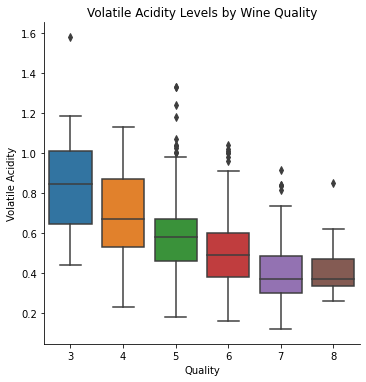

In [7]:
quality_group = dfred.groupby('quality')  # Group data by quality rating
va_mean = quality_group['volatile acidity'].mean()  # Collect acidity means
sns.catplot(x='quality', y='volatile acidity', kind='box', data=dfred)
plt.title('Volatile Acidity Levels by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

Looking at the distributions, it's clear that the higher quality rating wines have lower levels of volatile acidity. The average acidity across ratings decreases from about 0.85 to just under 0.4. There is still variability though with some outliers. For example there's one wine with a quality rating of 8, but a volatile acidity level just higher than the average of the 3 rating group. Of course, we know volatile acidity is not the only factor affecting quality.

More information on volatile acidity in wine can be found on [Decanter.com](https://www.decanter.com/learn/volatile-acidity-va-45532/).

<i>2. Which chemical feature has the most positive effect on a wine's quality?</i>

#### Sulfate Content

On the other end of the coefficient range is sulfate content with a coefficient of 1.947. Sulfates are chemical compounds derived from sulfur dioxide and are typically used a preservatives in food. Specifically in wine, they are used to prevent bacterial growth that contributes to discoloration and oxidation. This helps to preserve flavor and increase a wine's shelf life. This usage of sulfates also matches our model's results which show that quality is predicted to increase as sulfate content increases.

Just as with the volatile acidity, a plot of sulfate content across the quality ratings can visualize this relationship:

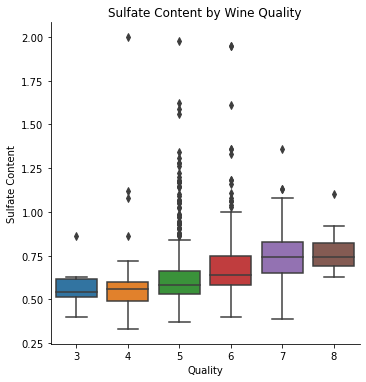

In [8]:
sulfate_mean = quality_group['sulphates'].mean()  # Collect sulfate means
sns.catplot(x="quality", y="sulphates", kind="box", data=dfred)  # Create box plots
plt.title('Sulfate Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Sulfate Content')
plt.show()

As expected based on the coefficient, the higher quality ratings have a higher sulfate content. The variability between the ratings is not as pronounced however, with the average content increasing only from about 0.50 to 0.75. This falls in line with a lower absolute value of the coefficient as well.

More information on sulfates in wine can be found on [Healthline.com](https://www.healthline.com/nutrition/sulfites-in-wine#sulfites).

### Other Considerations

<i>3. What other information could be used or is important to consider when attempting to predict wine quality?</i>

This relatively simple model provides an adequate baseline for predicting quality ratings based on chemical measurements. There are other factors to be accounted for that may improve the model further.

#### Data Optimization

Another aspect of the model that can be improved upon in future iterations is the handling of the data. Most importantly, the quality ratings can range from 0 to 10, and not all ratings are represented. Even in the data that's present, the very high and very low quality wines are under-represented. To create a better model this imbalance should be accounted for by upsampling the extreme ratings or through other techniques.

#### Missing Information

The original dataset was stripped of other information such as grape type, brand, and pricing dur to privacy reasons. It's not clear whether this information was availabe to the experts assigning the quality ratings. If it was, then this information should be accounted for within any models. Despite being well versed in wine, the experts could still have been influenced by this information.

There's also a lack of information about how the chemical inputs were obtained. Were they taken during the winemaking process or afterwards? Is there any variability in the type of tools used to measure that may affect the result? Although not directly related to the data, having a better understanding of the chemical measurement and rating process may prove useful in developing better models.

## Deployment

<i>4. How can those in the wine industry use this information to their benefit?</i>

The ultimate goal of this type of analysis is to provide stakeholders with a competitive advantage when making business decisions. Knowing the resulting quality of a wine before it's released can be very valuable. For restaurants, it can help determine their pricing for that wine as they would not want to over-price wines with a low predicted quality, but also not under-price wines that are predicted to be well liked.

Wineries can use this information to help identify problems in the winemaking process and prevent bad batches from being released. By sampling the chemical composition early on, they can see how variations in the measurements could affect the final quality instead of relying only on changes within the measurements. For example, if a certain batch is measured to have slightly less sulfates than normal, the measurement variation itself may not appear significant. Using this model though, the winery could examine exactly the effect the change has on the quality rather than trying to examine the sulfate measurement in isolation.

For wine enthusiasts this information is very interesting as they could use it to examine their own tastes compared to those of experts. They could conduct their own ratings, then work backwards to examine how it relates to the chemical composition. Then pick out wines with other compositions and predict what their own quality rating may be.